## 1. Library Imports and Data Loading

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Driver model

In [13]:
driver_df = pd.read_csv("data/driver_data_v2.csv")

In [14]:
driver_df

,driver,r1,r2,r3,r4,r5,picked
0,VER,45,36,-10,47,58,1.2
1,PER,31,31,22,33,40,0.0
2,NOR,16,8,23,19,36,0.0
3,LEC,22,37,38,31,34,1.2
4,SAI,36,26,46,28,30,1.2
5,HAM,12,6,-19,5,30,0.0
6,RUS,20,15,-3,13,27,0.0
7,MAG,7,7,8,9,17,2.0
8,ALO,7,16,9,14,15,0.4
9,GAS,6,-20,5,5,13,0.8


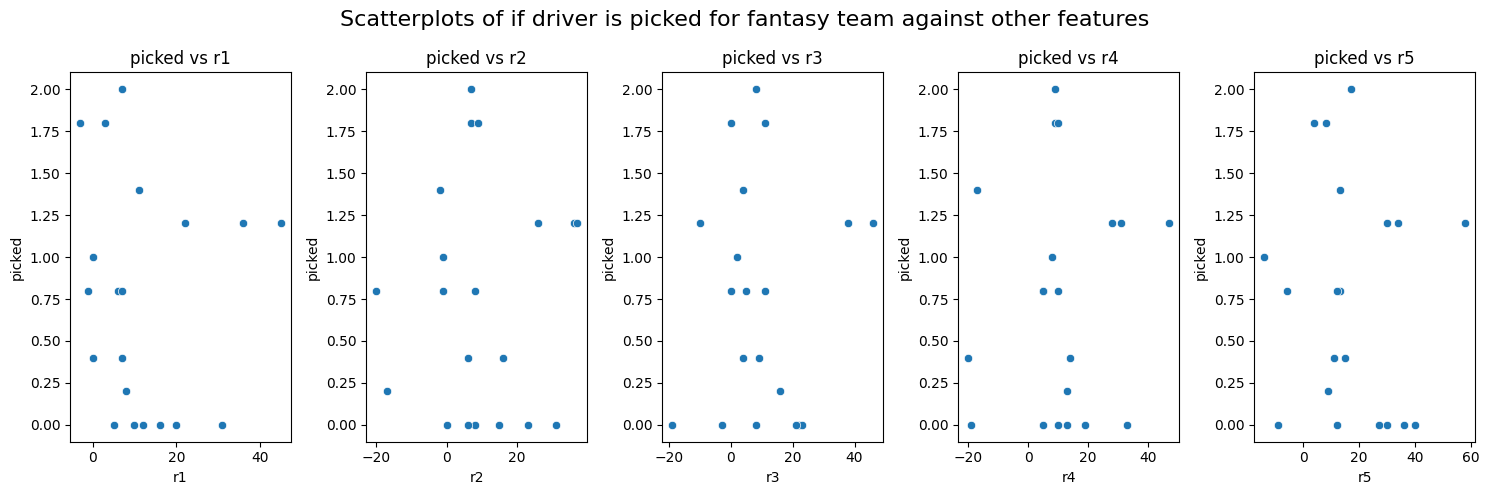

In [15]:
# Make sure the relationship looks linear
possible_features = ['r1', 'r2', 'r3', 'r4', 'r5']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=driver_df, x=feature, y="picked", ax=axes[index])
    axes[index].set_title(f'picked vs {feature}')

fig.suptitle("Scatterplots of if driver is picked for fantasy team against other features", fontsize=16)
fig.tight_layout()

## Constructor model

In [16]:
constructor_df = pd.read_csv("data/constructor_data_v2.csv")

In [17]:
constructor_df

,constructor,r1,r2,r3,r4,r5,picked
0,RED,89,90,32,108,126,2.4
1,FER,73,58,92,59,74,3.0
2,MER,42,36,-17,28,62,0.0
3,MCL,36,41,54,39,62,0.6
4,AST,20,9,35,32,29,0.0
5,ALP,12,-13,6,11,28,0.0
6,HAA,9,19,20,20,26,0.0
7,WIL,4,14,5,-10,20,0.0
8,KCK,10,-4,7,-8,4,0.0
9,VRB,7,4,24,-4,-14,0.0


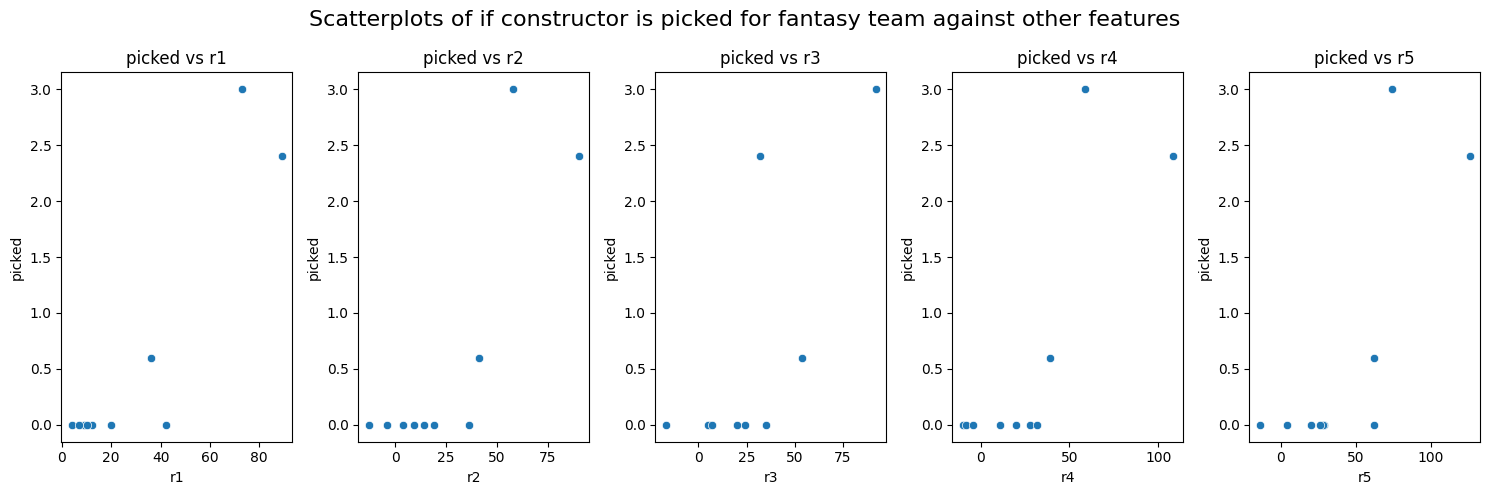

In [18]:
# Make sure the relationship looks linear
possible_features = ['r1', 'r2', 'r3', 'r4', 'r5']

# Create 3 axes in 1 row that don't share the y axis
fig, axes = plt.subplots(nrows=1, ncols=len(possible_features), figsize=(15, 5), sharey=False)

# Loop through 
for index, feature in enumerate(possible_features):
    sns.scatterplot(data=constructor_df, x=feature, y="picked", ax=axes[index])
    axes[index].set_title(f'picked vs {feature}')

fig.suptitle("Scatterplots of if constructor is picked for fantasy team against other features", fontsize=16)
fig.tight_layout()

## Use backward elimination to select our features

In [22]:
# Create the model with everything first
selected_features = ["r1", "r2", "r3", "r4", "r5"]
y_train = constructor_df["picked"]

# Initialize the model
model = LinearRegression()

# Perform backward selection
while len(selected_features) > 1:
    # Train and calculate initial score
    X_train = constructor_df[selected_features]
    model.fit(X_train, y_train)
    initial_score = model.score(X_train, y_train)

    print("Features:", selected_features, "Score:", initial_score)

    worst_feature = None
    worst_score_diff = 1
    
    for feature in selected_features:
        # Create a new model without the current feature
        X_temp = X_train.drop(feature, axis=1)
        
        # Fit the model on the training data
        model.fit(X_temp, y_train)
        
        # Evaluate the model
        score = model.score(X_temp, y_train) 

        # Find the difference in the scores
        score_diff = initial_score - score

        print("Feature:", feature, "Score Diff:", score_diff, "Score:", score)
        
        # Update the worst feature if the current feature worsens the score
        if score_diff < worst_score_diff:
            worst_score_diff = score_diff
            worst_feature = feature
    
    # Remove the worst feature from the list of selected features
    selected_features.remove(worst_feature)
    print("Removed Feature:", worst_feature)

# Print final feature score
X_train = constructor_df[selected_features]
model.fit(X_train, y_train)
initial_score = model.score(X_train, y_train)

print("Features:", selected_features, "Score:", initial_score)

Features: ['r1', 'r2', 'r3', 'r4', 'r5'] Score: 0.9286237197283309
Feature: r1 Score Diff: 0.07695457331644784 Score: 0.8516691464118831
Feature: r2 Score Diff: 0.00012048989068080829 Score: 0.9285032298376501
Feature: r3 Score Diff: 0.07054852920375776 Score: 0.8580751905245732
Feature: r4 Score Diff: 0.004944885800017174 Score: 0.9236788339283137
Feature: r5 Score Diff: 0.0007389707092181341 Score: 0.9278847490191128
Removed Feature: r2
Features: ['r1', 'r3', 'r4', 'r5'] Score: 0.9285032298376501
Feature: r1 Score Diff: 0.09176848645814562 Score: 0.8367347433795045
Feature: r3 Score Diff: 0.07264310427653242 Score: 0.8558601255611177
Feature: r4 Score Diff: 0.0049005917160264145 Score: 0.9236026381216237
Feature: r5 Score Diff: 0.0006233616605954007 Score: 0.9278798681770547
Removed Feature: r5
Features: ['r1', 'r3', 'r4'] Score: 0.9278798681770547
Feature: r1 Score Diff: 0.11831298575391813 Score: 0.8095668824231366
Feature: r3 Score Diff: 0.10673936959301833 Score: 0.82114049858403

Should onlt use features 'r1', 'r3', and 'r4' because the provide the best score without over-fitting the data

In [28]:
# Extract Data
X = constructor_df[["r1", "r3", "r4"]]
y = constructor_df["picked"]

# split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Create the model
model = LinearRegression()

# Train the model
model = model.fit(X_train, y_train)

print(model.coef_, model.intercept_)

[ 0.0386296   0.01454342 -0.01013457] -0.6915012284458744


In [29]:
# make predictions on test data
y_pred = model.predict(X_test)